In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_feather('../optimized_alldata.feather')
df.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,nflId,pff_role,...,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,
                               'datatypes': df.dtypes})
percent_missing

gameId             0.0
season             0.0
week               0.0
gameDate           0.0
gameTimeEastern    0.0
                  ... 
a                  0.0
dis                0.0
o                  0.0
dir                0.0
event              0.0
Length: 70, dtype: float64

In [5]:
newcol = missing_value_df.loc[missing_value_df['percent_missing']<=15, 'column_name']
newcol

gameId                                    gameId
season                                    season
week                                        week
gameDate                                gameDate
gameTimeEastern                  gameTimeEastern
homeTeamAbbr                        homeTeamAbbr
visitorTeamAbbr                  visitorTeamAbbr
playId                                    playId
nflId                                      nflId
pff_role                                pff_role
pff_positionLinedUp          pff_positionLinedUp
height                                    height
weight                                    weight
birthDate                              birthDate
collegeName                          collegeName
officialPosition                officialPosition
displayName                          displayName
playDescription                  playDescription
quarter                                  quarter
down                                        down
yardsToGo           

In [6]:
newcolumns = []
for index, value in newcol.items():
    newcolumns.append(value)

In [7]:
dfnew = df.loc[:,newcolumns]

In [8]:
dfnew.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,playId,nflId,pff_role,...,team,playDirection,x,y,s,a,dis,o,dir,event
0,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.77,24.22,0.29,0.30,0.03,165.16,84.99,None
1,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.22,0.23,0.11,0.02,164.33,92.87,None
2,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.78,24.24,0.16,0.10,0.01,160.24,68.55,None
3,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.73,24.25,0.15,0.24,0.06,152.13,296.85,None
4,2021090900,2021,1,09/09/2021,20:20:00,TB,DAL,97,25511,Pass,...,TB,right,37.69,24.26,0.25,0.18,0.04,148.33,287.55,None


In [9]:
numeric_feature = [col for col in dfnew.columns if dfnew[col].dtype != 'O']
categorical_feature = [col for col in dfnew.columns if dfnew[col].dtype ==
'O']

In [13]:
dfnumbers = df.iloc[::, -8:-1]
dfnumbers.head()

,x,y,s,a,dis,o,dir
0,37.77,24.22,0.29,0.30,0.03,165.16,84.99
1,37.78,24.22,0.23,0.11,0.02,164.33,92.87
2,37.78,24.24,0.16,0.10,0.01,160.24,68.55
3,37.73,24.25,0.15,0.24,0.06,152.13,296.85
4,37.69,24.26,0.25,0.18,0.04,148.33,287.55


In [20]:
dffracx = dfnumbers.sample(frac=0.25)

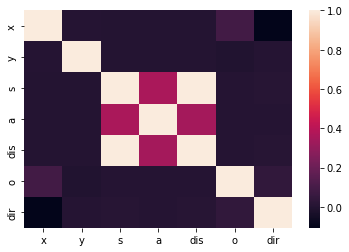

In [21]:
sns.heatmap(dffracx.corr())
plt.show()

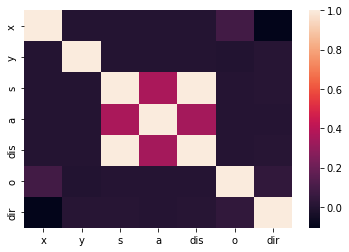

In [19]:
sns.heatmap(dfnumbers.corr())
plt.show()

In [17]:
dffrac = dfnew.sample(frac=0.25)
dffrac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988173 entries, 3444949 to 502852
Data columns (total 53 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   gameId                  int64         
 1   season                  int64         
 2   week                    int64         
 3   gameDate                object        
 4   gameTimeEastern         object        
 5   homeTeamAbbr            object        
 6   visitorTeamAbbr         object        
 7   playId                  int64         
 8   nflId                   int64         
 9   pff_role                object        
 10  pff_positionLinedUp     object        
 11  height                  object        
 12  weight                  int64         
 13  birthDate               object        
 14  collegeName             object        
 15  officialPosition        object        
 16  displayName             object        
 17  playDescription         object        
 1

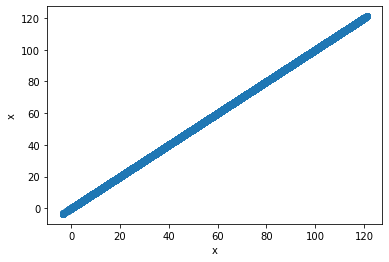

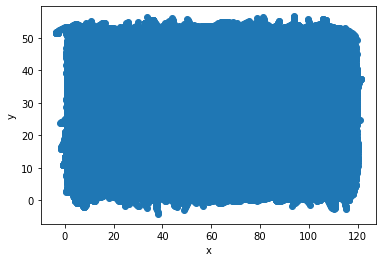

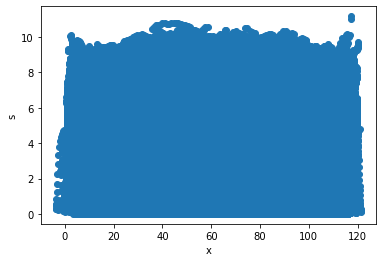

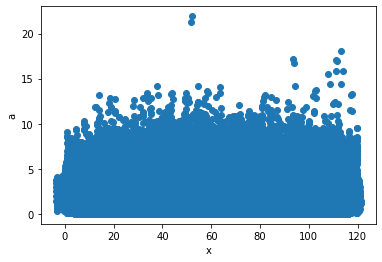

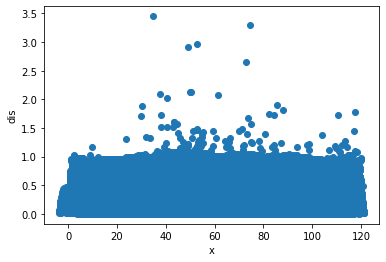

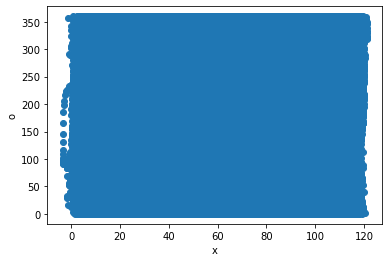

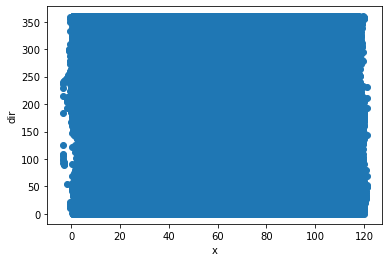

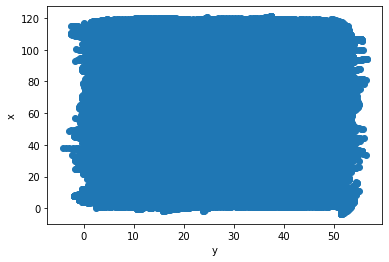

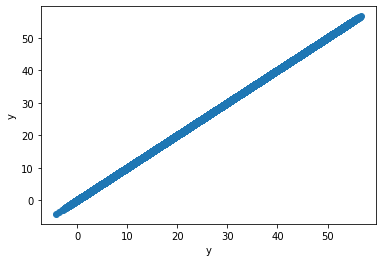

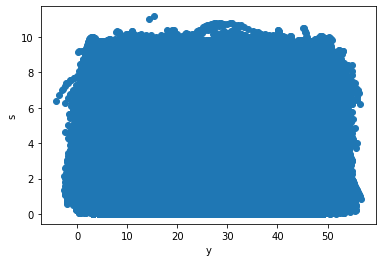

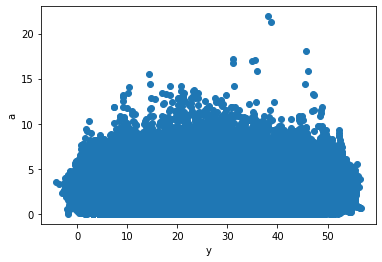

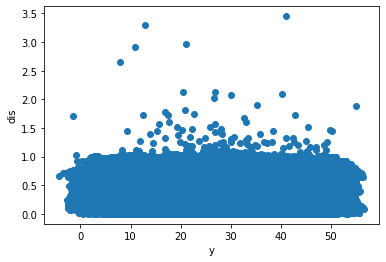

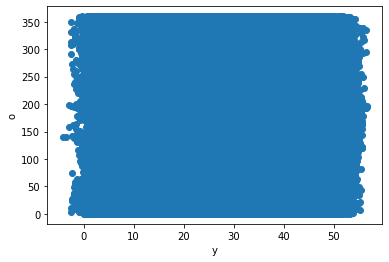

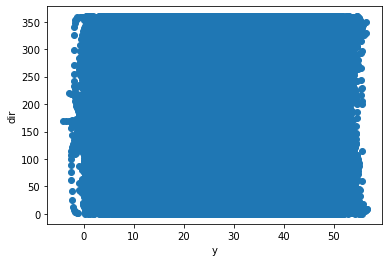

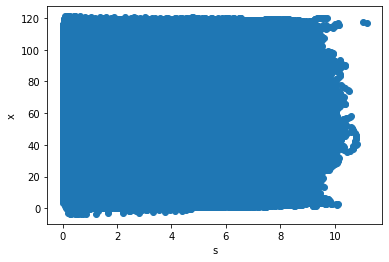

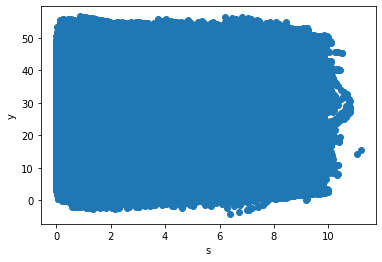

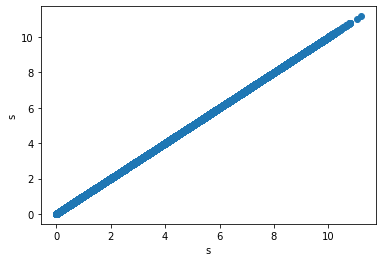

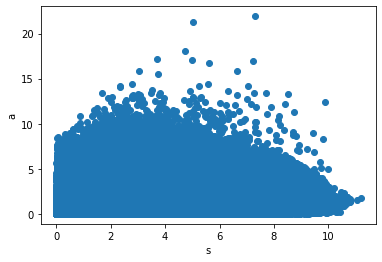

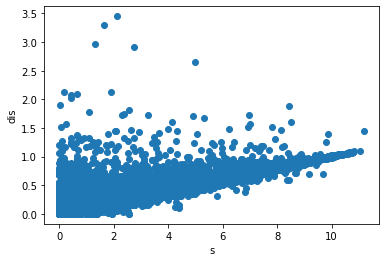

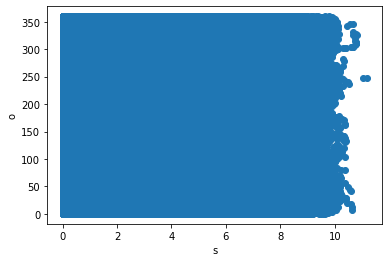

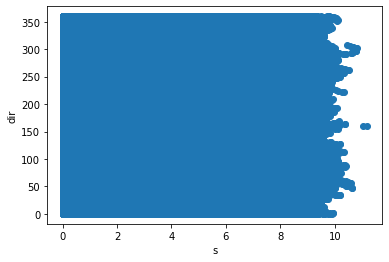

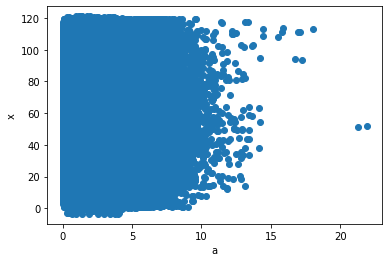

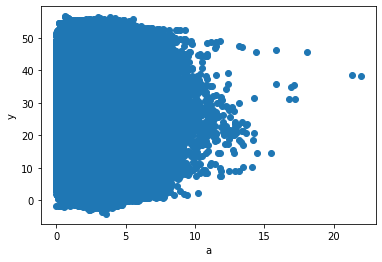

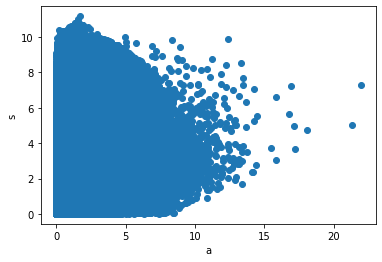

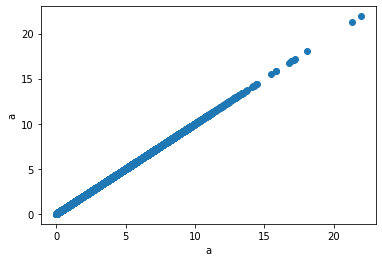

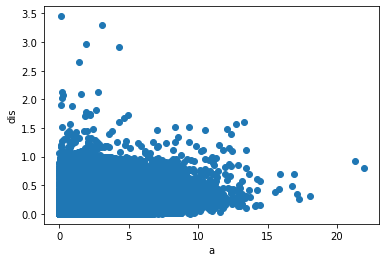

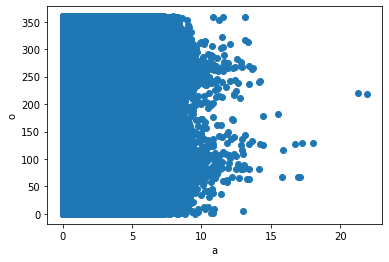

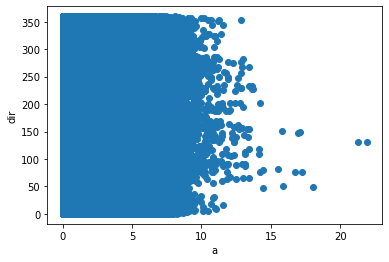

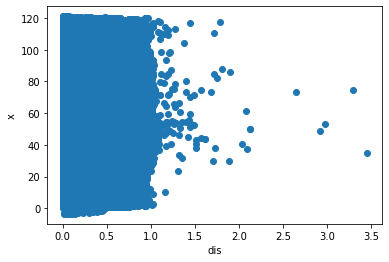

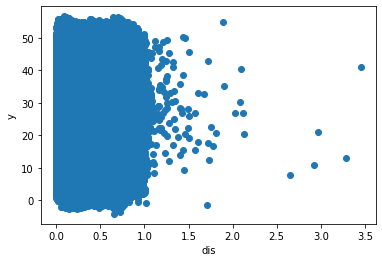

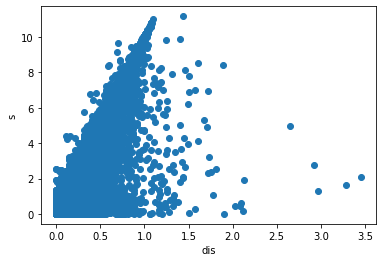

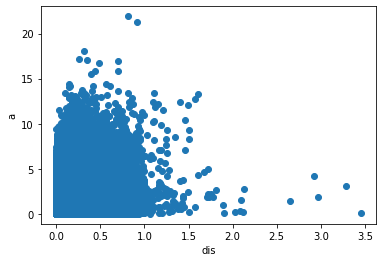

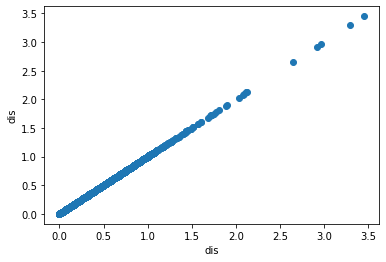

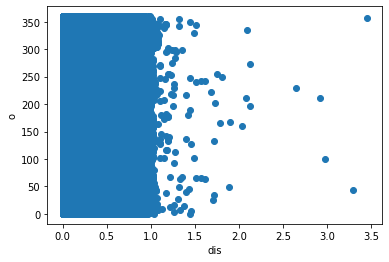

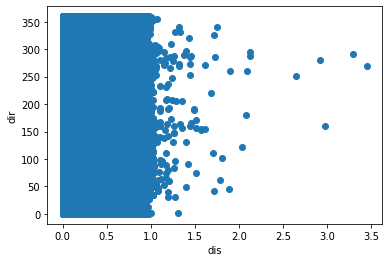

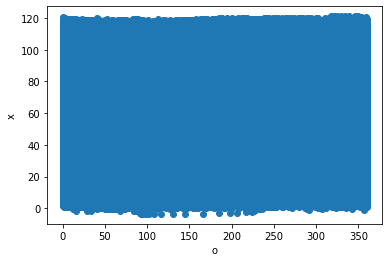

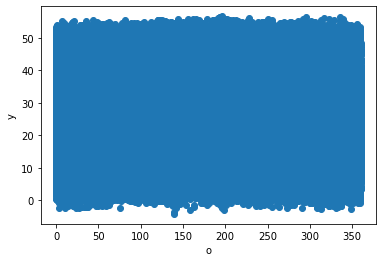

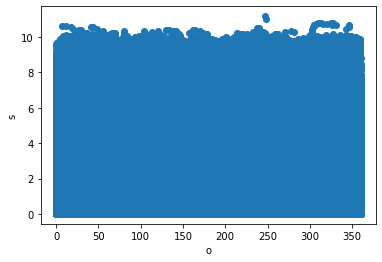

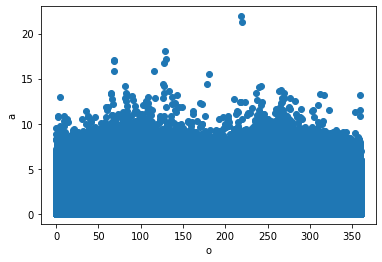

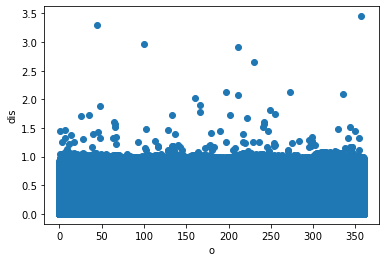

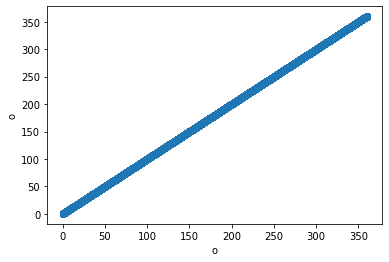

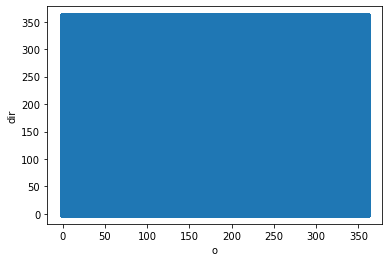

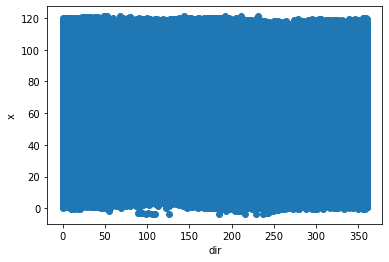

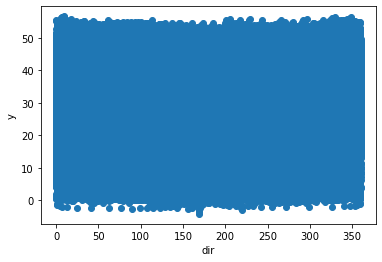

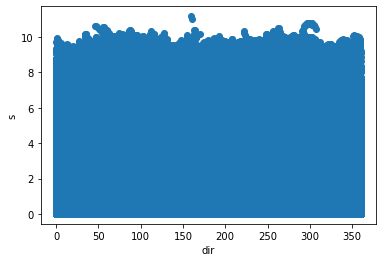

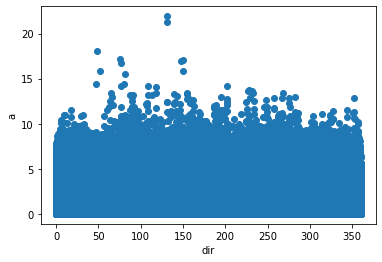

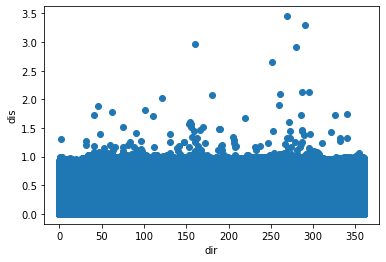

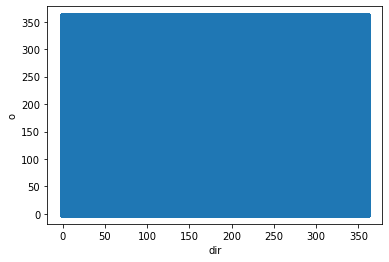

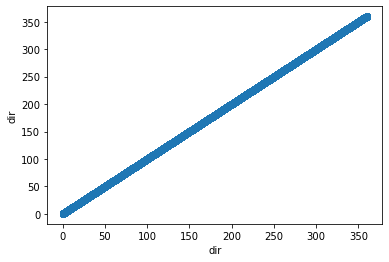

In [14]:
for col_x in dfnumbers.columns:
    for col_y in dfnumbers.columns:
        try:
            fig = plt.figure()
            ax = fig.add_subplot()
            ax.scatter(dfnumbers[col_x], dfnumbers[col_y])
            ax.set_xlabel(col_x)
            ax.set_ylabel(col_y)
            plt.savefig(f'scatter_{col_x} vs {col_y}.png')
            
        except Exception as ex:
            print(f'Error: scatter_{col_x} vs {col_y}.png')
            

<AxesSubplot:>

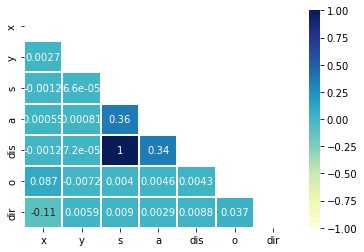

In [24]:
mask = np.zeros_like(dffracx.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(dffracx.corr(), vmin=-1, vmax=1, center=0, annot=True, linewidths=.1,cmap='YlGnBu', mask=mask)